In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [359]:
data = pd.read_csv('Data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [360]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


### Checking for missing values

In [362]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [363]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can see that the maximum bedrooms within a block are 6445 while mean bedrooms are 537. So it seems like the data is skewed, we will check that with a histogram

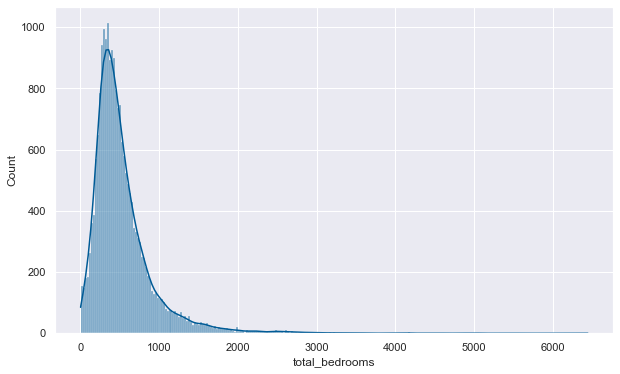

In [364]:
plt.figure(figsize= (10, 6))
sns.histplot(data['total_bedrooms'], color = '#005b96', kde= True);

It is definitely skewed, therefore we will fill missing values with median number of rooms within a block

In [365]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace= True)

## EDA

In [366]:
# plt.figure(figsize= (20, 8))
# sns.heatmap(data.corr(), annot= True, cmap='YlGnBu')
# plt.show()

Median income is clearly our most important feature

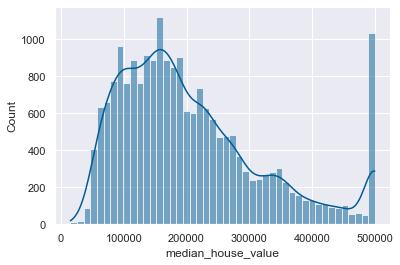

In [367]:
sns.histplot(data['median_house_value'], color = '#005b96', kde= True);

In [370]:
import plotly.express as px
fig = px.line(data, x='population', y='households', color='ocean_proximity', symbol="ocean_proximity")
fig.show()

In [ ]:
for i in data.columns[:-1]:
    sns.histplot(data[i], kde=True, color = '#005b96')
    plt.title(i)
    print(data[i].skew())
    plt.show()


### Here you see almost all the columns is skewed 

In [371]:
fig = px.scatter(data, x='longitude', y='latitude', color="population",labels="population")
fig.show()
print("need to scale")

need to scale


Our target variable is clearly skewed. Therefore we will apply log transformation to it later

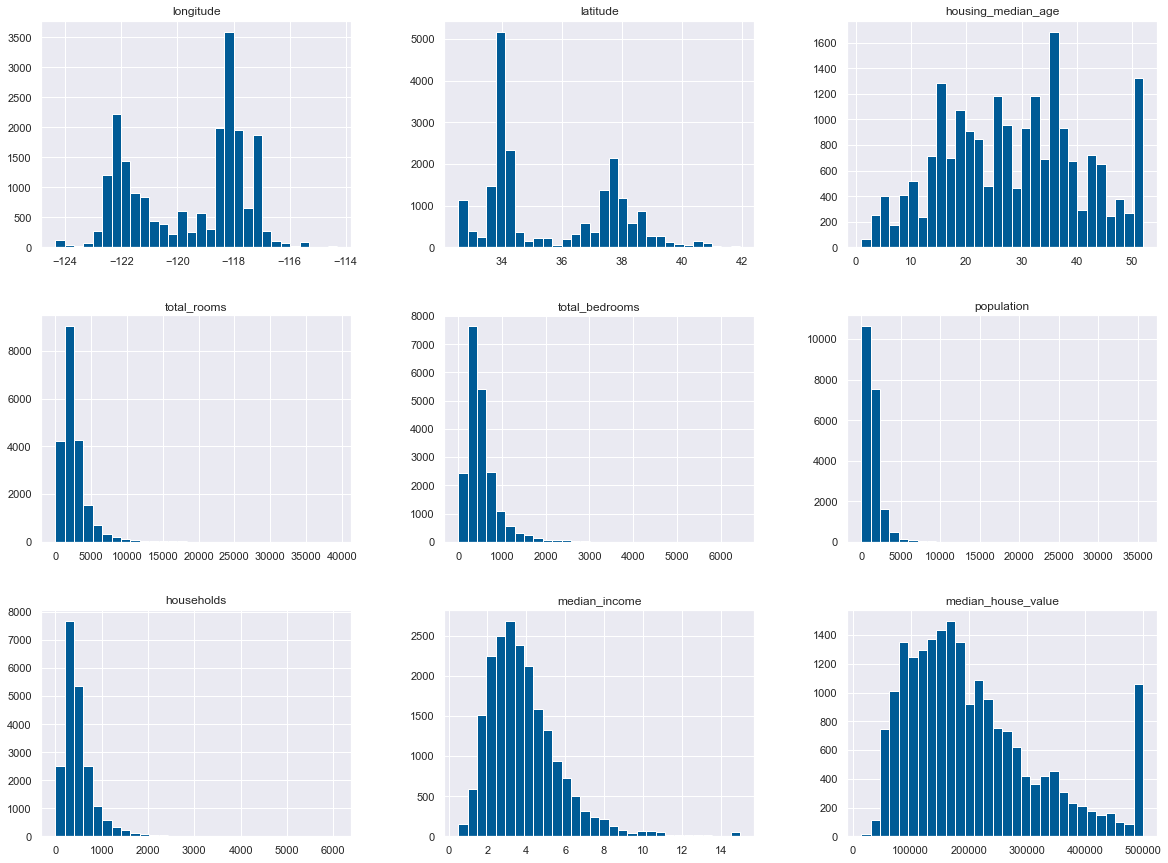

In [372]:
data.hist(bins = 30, figsize=(20, 15), color = '#005b96');

We can clearly see that lot of our features are skewed. Therefore, we will have to deal with it later when we will do feature transformation

In [373]:
grid = sns.PairGrid(data, vars=['total_rooms', 'housing_median_age', 'median_income', 'median_house_value'],
                    height=2, aspect = 2)

grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'coolwarm', shade = True)

plt.show()

KeyboardInterrupt: 

There are lots of outliers in our features. We will apply log transformation later to deal with it

Let us also check out the categorical variable we have

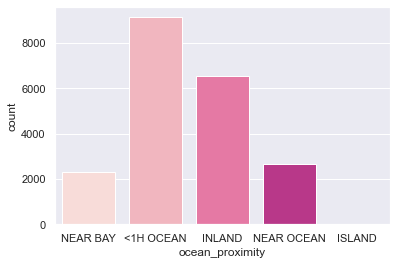

In [374]:
sns.countplot(x = data['ocean_proximity'], palette= 'RdPu');

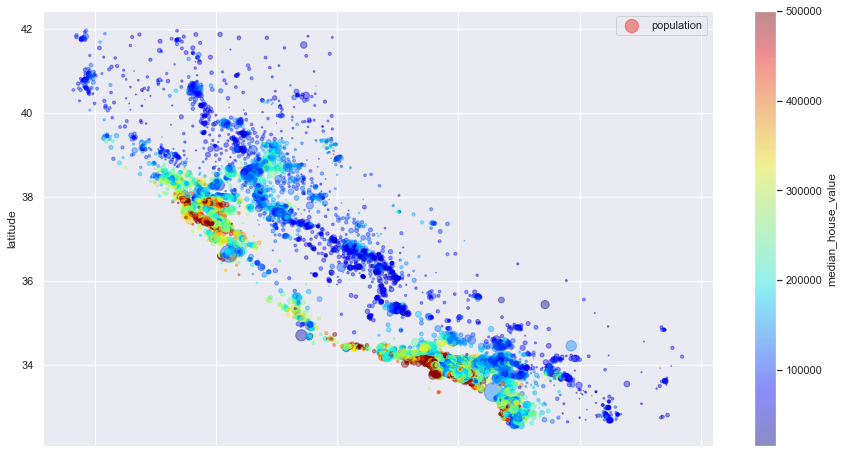

In [375]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

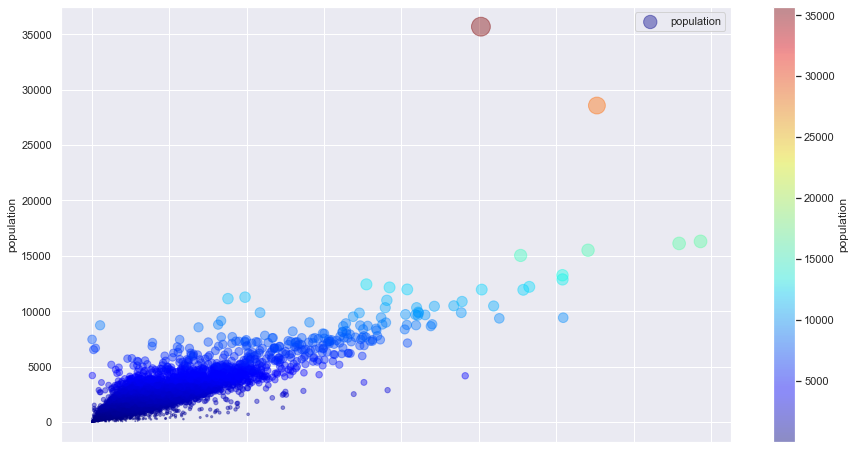

In [376]:
data.plot(kind="scatter", x="total_rooms", y="population", alpha=0.4,
         label="population", figsize=(15,8),s=data["population"]/100,
        c="population", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

# Again Clear cut outlier 

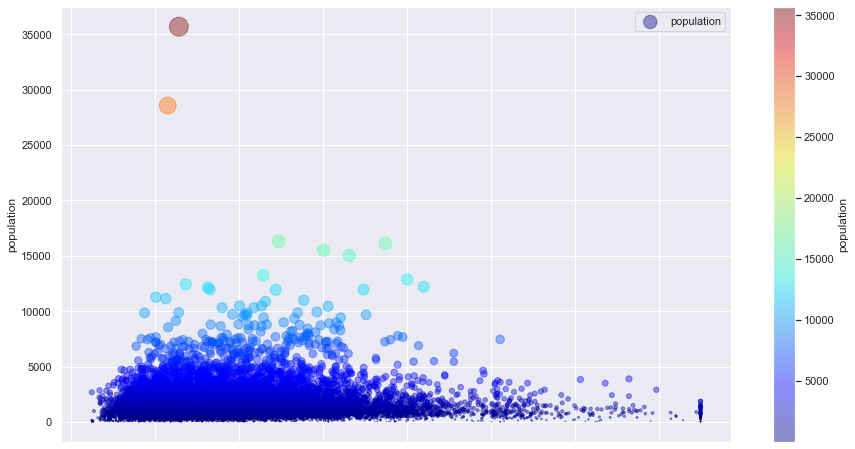

In [377]:
data.plot(kind="scatter", x="median_income", y="population", alpha=0.4,
         label="population", figsize=(15,8),s=data["population"]/100,
        c="population", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

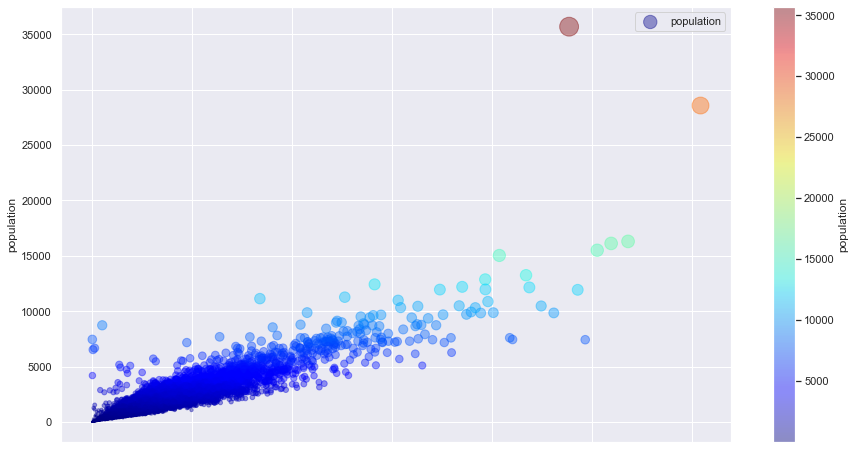

In [378]:
data.plot(kind="scatter", x="households", y="population", alpha=0.4,
         label="population", figsize=(15,8),
        c="population",s=data["population"]/100,  cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


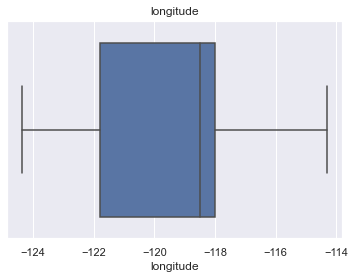

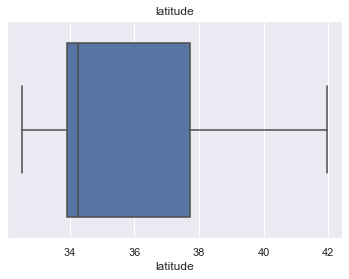

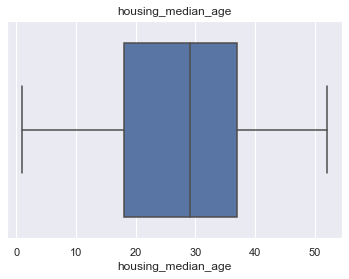

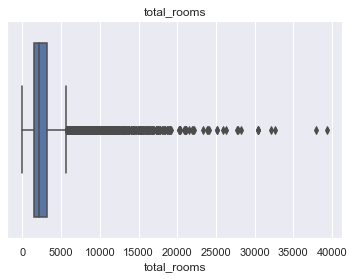

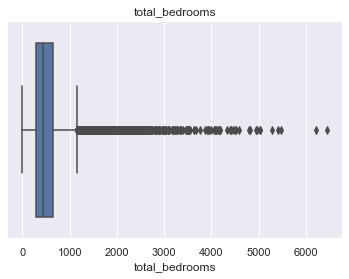

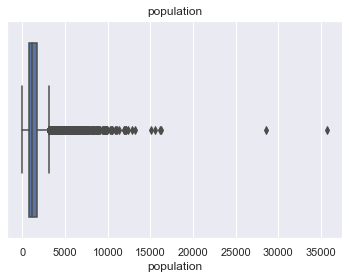

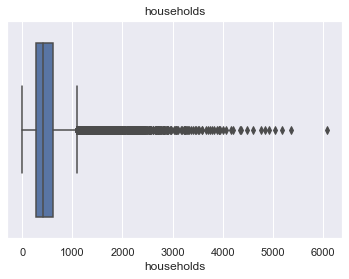

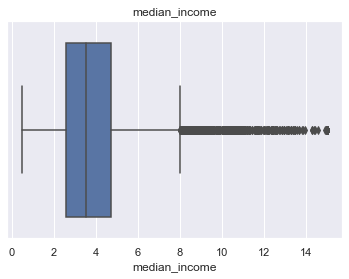

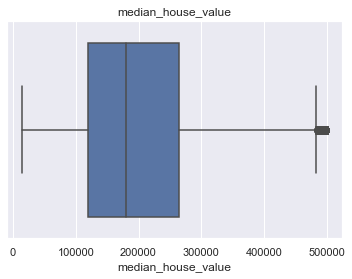

In [380]:
for i in data.columns[:-1]:
    
    sns.boxplot(data=data, x=i)
    plt.title(i)
    plt.show()
    
    

## Clear cut outlier need to bining or binariztion -- Quantile Bining and its also control your spread in data

## Feature Engineering

## make new features like square feet or longitude x latitude 

In [381]:
data['bed_per_room'] = data['total_bedrooms'] / data['total_rooms'] #very useful columns

In [382]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
bed_per_room          0
dtype: int64

In [383]:
X = data.drop(['median_house_value'], axis=1)
y = np.log(data.median_house_value) # Applying log transformation

## Feature Transformations

In [384]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(X[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


In [385]:
skewed_columns = skew_df[skew_df['Abs_Skew'] > 0.5]['Feature'].values
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [388]:
for i in skewed_columns:
    print("Skewness of column : ",i, "is :",data[i].skew())

Skewness of column :  total_rooms is : 4.147343450632158
Skewness of column :  total_bedrooms is : 3.4811408631013117
Skewness of column :  population is : 4.93585822672712
Skewness of column :  households is : 3.410437711667147
Skewness of column :  median_income is : 1.6466567021344465
Skewness of column :  bed_per_room is : 6.316904041913851


### After Log transformation 

In [389]:
for column in skewed_columns:
    X[column] = np.log(X[column])

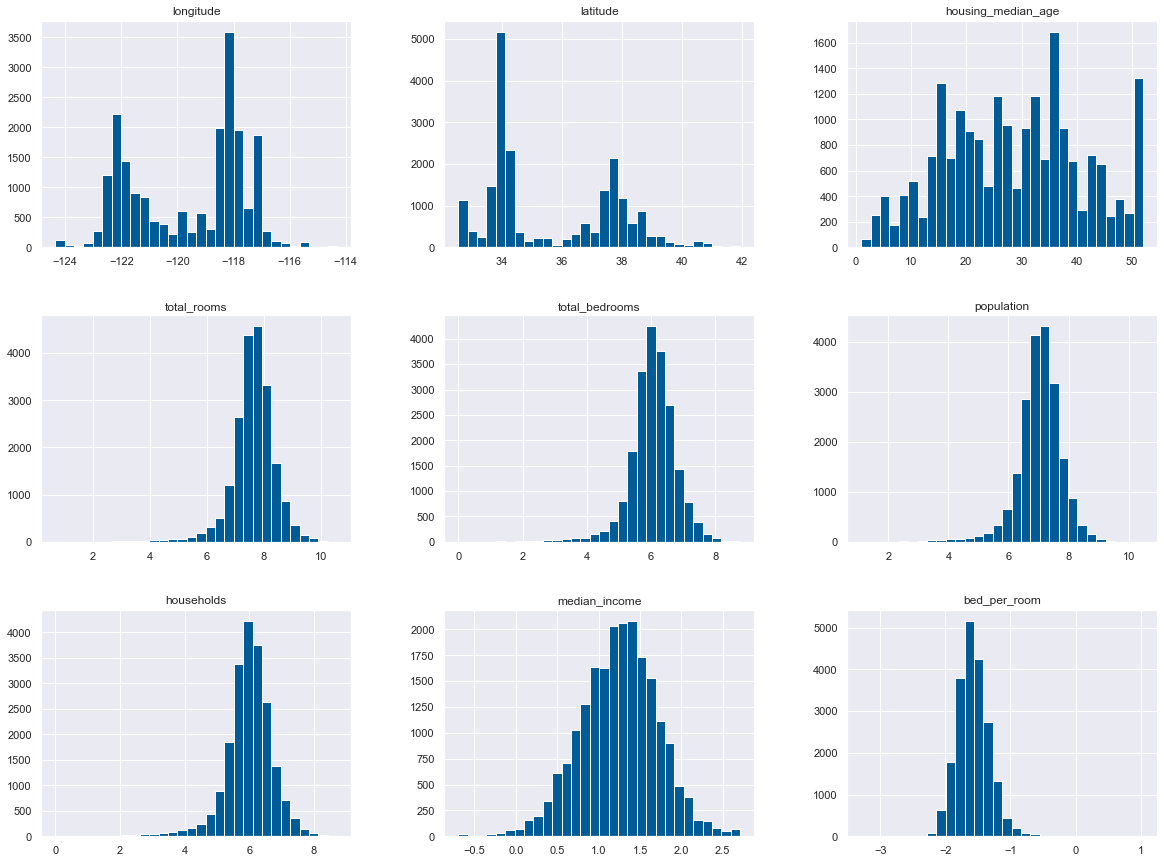

In [391]:
X.hist(bins = 30, figsize=(20, 15), color = '#005b96'); # slighlty left skewed

### Apply Log + Saqure Transformation

In [392]:
for col in skewed_columns[0:4]: # only first for 4 columns
    X[col]=np.square(X[col])

#### Now this is Good

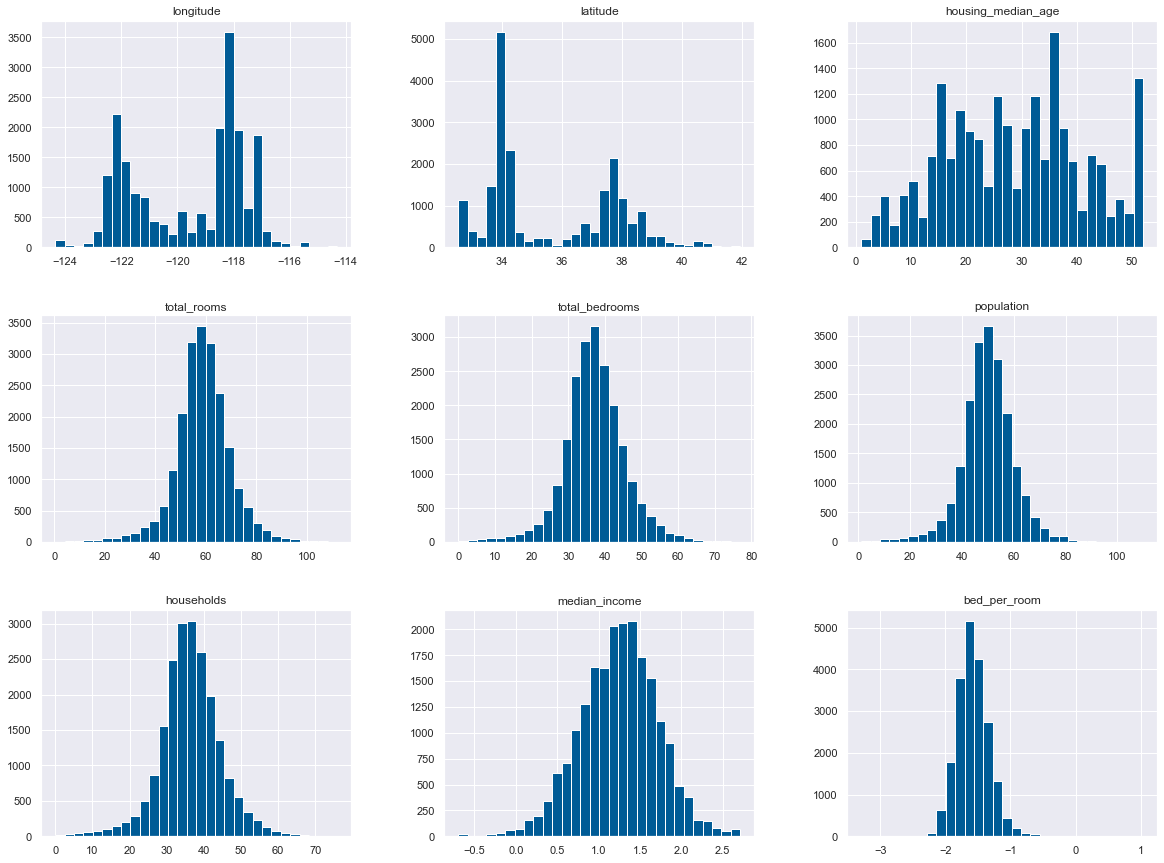

In [393]:
X.hist(bins = 30, figsize=(20, 15), color = '#005b96'); 

## Encoding

In [394]:
encoder=LabelEncoder()
X['ocean_proximity']=encoder.fit_transform(X['ocean_proximity'])

## Scaling

In [395]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,45.967341,23.617777,33.345446,23.389623,2.119287,3,-1.920110
1,-122.22,37.86,21.0,78.636267,49.119145,60.585061,49.519758,2.116424,3,-1.859204
2,-122.24,37.85,52.0,53.158313,27.531262,38.521585,26.792526,1.982022,3,-2.043951
3,-122.25,37.85,52.0,51.121311,29.807074,39.997516,29.042094,1.730434,3,-1.690331
4,-122.25,37.85,52.0,54.678528,31.750854,40.155360,30.878338,1.347086,3,-1.759704


In [396]:
from sklearn.preprocessing import MinMaxScaler

In [397]:
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Linear Regression

In [399]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)


In [400]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
r2 = r2_score(y_test, predictions_lr)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.3429361638924436
R-square: 0.6376537897318297


## Feature Selection

### According to Linear Regression this features are very important and less important feature


In [401]:

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lr, random_state=42)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.to_list())

Weight,Feature
2.0341 ± 0.0919,latitude
1.7356 ± 0.0598,longitude
0.8559 ± 0.0175,median_income
0.4939 ± 0.0182,total_bedrooms
0.4791 ± 0.0237,population
0.0879 ± 0.0059,households
0.0610 ± 0.0062,total_rooms
0.0117 ± 0.0043,housing_median_age
0.0034 ± 0.0009,ocean_proximity
-0.0028 ± 0.0016,bed_per_room


## KNN

### According to knn this features are very important and less important feature


In [402]:

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(knn, random_state=42)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.to_list())

Weight,Feature
0.4885 ± 0.0149,median_income
0.4092 ± 0.0137,ocean_proximity
0.3978 ± 0.0271,latitude
0.2227 ± 0.0138,longitude
0.1027 ± 0.0086,population
0.0904 ± 0.0131,housing_median_age
0.0387 ± 0.0065,total_bedrooms
0.0323 ± 0.0065,households
0.0278 ± 0.0023,bed_per_room
0.0262 ± 0.0053,total_rooms


In [405]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [406]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_knn))
r2 = r2_score(y_test, predictions_knn)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.280277415006533
R-square: 0.7579676825607957


## Random Forest

### According to RandomForest this features are very important and less important feature

In [407]:

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf, random_state=42)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.to_list())



Weight,Feature
0.6115 ± 0.0273,median_income
0.3258 ± 0.0112,longitude
0.3067 ± 0.0120,latitude
0.2949 ± 0.0140,ocean_proximity
0.0358 ± 0.0015,bed_per_room
0.0333 ± 0.0032,housing_median_age
0.0207 ± 0.0020,population
0.0072 ± 0.0008,total_rooms
0.0056 ± 0.0005,total_bedrooms
0.0047 ± 0.0012,households


In [408]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [409]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.23306823940792012
R-square: 0.8326355003422025


## CatBoost

In [357]:
catboost = CatBoostRegressor(verbose= 0)
catboost.fit(X_train, y_train)
predictions_cb = catboost.predict(X_test)

NameError: name 'CatBoostRegressor' is not defined

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_cb))
r2 = r2_score(y_test, predictions_cb)

print('RMSE:', rmse)
print('R-square:', r2)

## XGBoost

In [ ]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
predictions_xgb = xgboost.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_xgb))
r2 = r2_score(y_test, predictions_xgb)

print('RMSE:', rmse)
print('R-square:', r2)

## LightGBM

In [ ]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
predictions_lgb = lgb.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lgb))
r2 = r2_score(y_test, predictions_lgb)

print('RMSE:', rmse)
print('R-square:', r2)

In [ ]:
from sklearn.model

## Gradient Boosting

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions_gbr = gbr.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_gbr))
r2 = r2_score(y_test, predictions_gbr)

print('RMSE:', rmse)
print('R-square:', r2)

Performance of catboost, xgboost, LightGBM and random forest clearly ourperforms the multiple linear regression, knn and gradient boosting. So lets combine these 4 models to get the final predictions

In [ ]:
final_predictions = (
    0.25 * predictions_cb+
    0.25 * predictions_rf+
    0.25 * predictions_xgb+
    0.25 * predictions_lgb
)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)

print('RMSE:', rmse)
print('R-square:', r2)

In [ ]:
final_predictions

We will have to take exponent of our final predictions to get them back to our original scale

In [ ]:
final_predictions = np.exp(final_predictions)
y_test = np.exp(y_test)

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions.round(2)})

## Visualising the result

In [ ]:
plt.figure(figsize= (10, 6))
sns.scatterplot(x= y_test, y= final_predictions, color= '#005b96')
plt.xlabel('Actual House value')
plt.ylabel('Predicted House Value')
plt.show()

In [ ]:
plt.figure(figsize= (10, 6))
sns.residplot(x= y_test, y = final_predictions, color= '#005b96')
plt.show()

In [ ]:
resid = y_test - final_predictions
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');

Distribution of errors seems like normal, so our model is doing a decent job.